# <b><u>Bank Customer Churn Analysis and Prediction</u></b>

## <u>Data Set Introduction</u>

The purpose of this notebook is to;
1. Analyse the "Bank Customer Churn" dataset to derive actionable insights.

2. Identify important features causing customer churn and create a predictive churn model. 

<b><u>What is Customer Churn?</u></b>  
Customer churn occurs when a customer stops using a particular product/service or stops dealing with the business as a whole.  

In business context, it is important to identify and understand the leading factors of churn among customers. It is a well known fact that it is easier and less costlier to keep existing customer than source for new ones.   
As such, it is important for businesses to retain customers while staying competitive and profitable.   



The data set contains information valuable to predict a bank's churn rate. The data contains 10000 records and 18 columns.

A breif description of each column is described below:

1.  <b> RowNumber </b> — corresponds to the record (row) number and has no effect on the output.   
2.  <b> CustomerId </b> — contains random values and has no effect on customer leaving the bank.  
3.  <b> Surname </b> — the surname of a customer has no impact on their decision to leave the bank.  
4.  <b> CreditScore </b> — can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.  
5.  <b> Geography </b> — a customer’s location can affect their decision to leave the bank.  
6.  <b> Gender </b> — it’s interesting to explore whether gender plays a role in a customer leaving the bank.  
7.  <b> Age </b> — this is certainly relevant, since older customers are less likely to leave their bank than younger ones.  
8.  <b> Tenure </b> — refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.  
9.  <b> Balance </b> — also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.  
10. <b> NumOfProducts </b> — refers to the number of products that a customer has purchased through the bank.  
11. <b> HasCrCard </b> — denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.  
12. <b> IsActiveMember </b> — active customers are less likely to leave the bank.  
13. <b> EstimatedSalary </b> — as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.  
14. <b> Exited </b> — This is the target variable and it shows whether or not the customer left the bank.    
15. <b> Complain </b> — customer has complaint or not.  
16. <b> Satisfaction Score </b> — Score provided by the customer for their complaint resolution.  
17. <b> Card Type </b> — type of card hold by the customer.  
18. <b> Points Earned </b> — points earned through various loyalty or rewards programs including credit card usage and other banking products or services. 

<b> Note </b>

- It is important to note that the dataset is tidy and it is of good quality and such does not require cleaning. 

- It is advantageous for banks to know what leads a client towards the decision to leave the company.

- Churn prevention allows companies to develop loyalty programs and retention campaigns to keep as many customers as possible.



This notebook analysis will be structured as follows:
  
<b><u>Data Analysis</u></b>  
<b>A. Loading:</b> The dataset is loaded into pandas dataframe for analysis.   
<b>B. Exploratory Data Analysis (EDA)- Data Exploration and Visualization:</b> Exploration; Data is explored to understand the data structure, level of quality, statistical summary of the dataset and identify patterns or relationships. Visualization; Data is visualized using various techniques to explore data.  
<b>C. EDA Insight Summary:</b> The explanation of the visualization and statistical summary.  

<b><u>Data Science</u></b>  
<b>D. Feature Selection:</b>  
<b>E. Model Training and Prediction:</b>  
<b>F. Model Interpretation:</b>  
    

# <b>Data Analysis</b>

## A. <b><u>Loading<u></b>
Loading the dataset called Bank Customer Churn (BCC) into pandas dataframe.

In [26]:
# Importing packages and setting plot to be embedded inline.  
# kindly note that jupyterlite notebook was used for this analysis. Remove piplite and run the codes
import piplite
await piplite.install('seaborn')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# loading the dataset, a .csv file and viewing the records using .head()

bcc_df = pd.read_csv('Customer-Churn-Records.csv', sep = ',')
bcc_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


## B.<b><u>Exploratory Data Analysis(EDA)</u></b>
### i.<b><u>Exploration:</u></b> 
In this section of EDA, data exploration is performed on the data to better understand and find relationships in the dataset. 

In [3]:
#displaying the amount of rows and column of the dataset using .shape method
bcc_df.shape
print("There are {} columns and {} rows".format(bcc_df.shape[0], bcc_df.shape[1]))

There are 10000 columns and 18 rows


In [4]:
#inspecting the datatype of the dataset using .info()
bcc_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [5]:
#displaying the summary statistic of the data
bcc_df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


From the summary statistics above, there are no missing values as the count statistic across all columns are the same
   

In [6]:
# checking for the sum of duplicates in the dataset

print(bcc_df.duplicated().sum())
print ('There are no duplicates in the dataset')

0
There are no duplicates in the dataset


<ipython-input-7-6019145694b6>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = bcc_df.iloc[:,2:].corr()


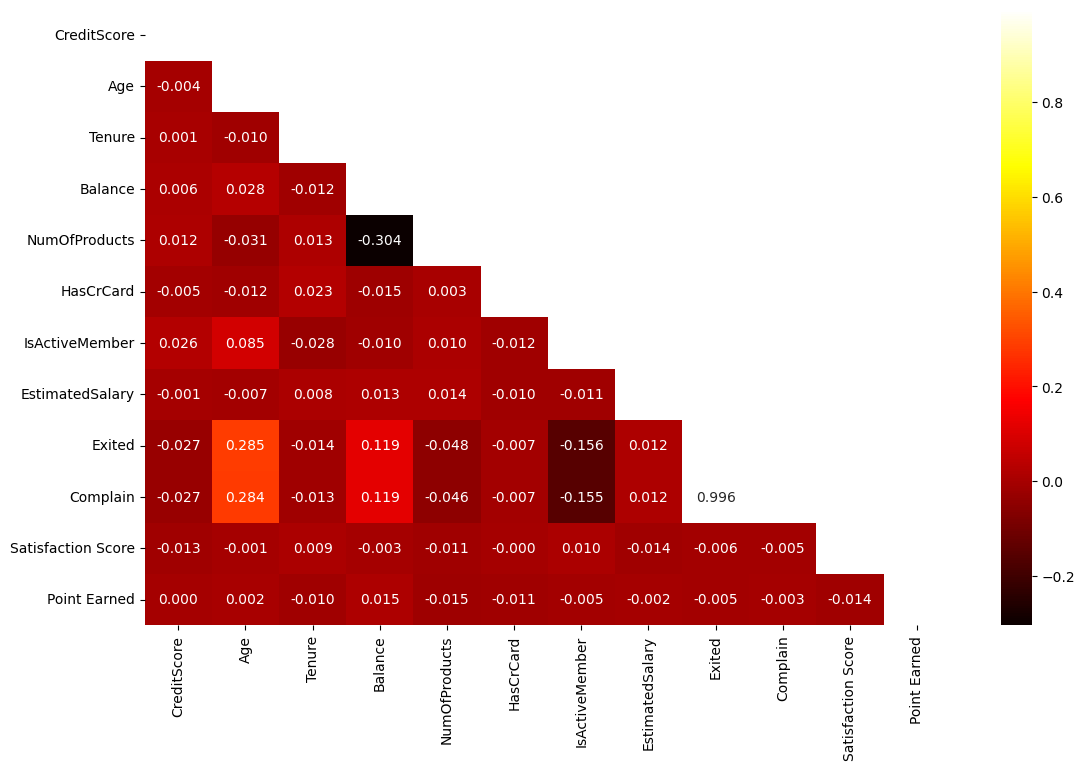

In [ ]:
    #Visualizing the correlation matrix using seaborn's heatmap to easily identify correlated variables.
    #np.triu zeros the upper triangle of the heatmap array.
    #mask removes cells with zeros.

    corr_matrix = bcc_df.iloc[:,2:].corr()
    plt.figure(figsize = [13,8])
    corr_viz = sns.heatmap( corr_matrix, cmap = 'hot', annot = True, fmt= '.3f', mask = np.triu(corr_matrix.corr())) 



From the correlation visualization matrix above, there are some notable relationships worth exploring. 

It is also important to note that part of the objective of this analysis is establish actionable hypothesis which can potentially reduce the Bank's customer churn rate.  

### ii.<b><u>Visualization:</u></b> 
In this section of EDA, data visualization is performed on the data to either visualize the data or identify a trend or relationship between/amongst variables.

Some of the relationships to be explored are outlined below:

<b>Univariate Visualization</b>  
1. Age: Visualize the age of the customers based on Age group.

<b>Bivariate Visualization</b>  
2. Churn rate of customers.  
3. Churn by Credit score.  
4. Churn by Age group: Determine the customer's churn rate by age group distribution.  
5. Churn rate by Tenure: Churn rate based on the number of years the client has been a customer of the bank.  
6. Churn rate by Number of Products.  
7. Churn rate by Geography.  
8. Churn rate by Gender.  
9. Churn rate by HasCrCard.


<b>Multivariate Visualization</b>  
10.  Churn by Number of products and Age/Age group.    
11.  Churn by Number of products and Balance.
12.  Churn by Active memebership and Age.     
13.  Churn by Credit score and Age_group.    
14.  Churn by Credit card ownership, Credit Score and Points Earned   
15.  Churn by Credit card ownership, Satisfaction score, Credit Score and Points Earned.      

### <b><u>Univariate Visualization </u></b> 

### 1. <b><u>Age: </u></b>   
Visual representation of the Bank's dcustomer age distribution using histogram. Further analyse by converting age from a discrete variable to a categorical variable.

The figure below shows that 'Age' is unimodal and is a right skewed distribution.This means that the age distribution is moderately young. To make this easily distinguishable, the age variable will be converted to a categorical variable.


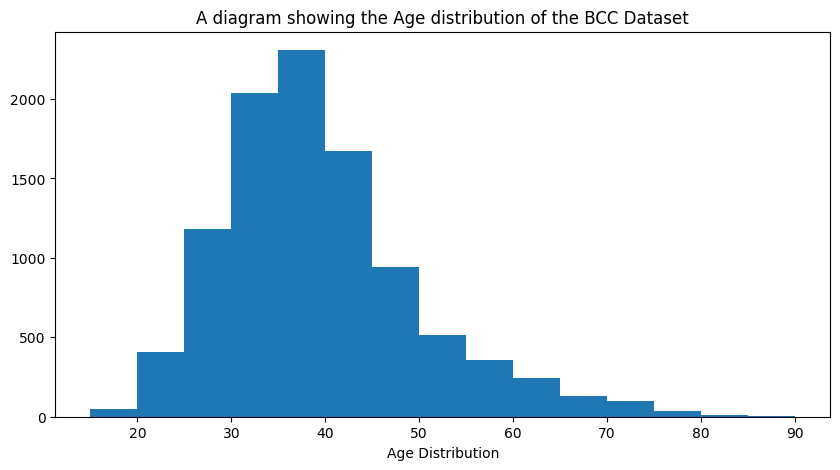

In [ ]:
#Visualizing the age group distribution of the dataset using histogram.
plt.figure(figsize = [10,5])
bins = np.arange(15, 92+3, 5) #specifying the min, max data point and step size of the bin
plt.hist(data = bcc_df, x = 'Age', bins = bins)
plt.xlabel('Age Distribution')
plt.title('A diagram showing the Age distribution of the BCC Dataset');
print("The figure below shows that 'Age' is unimodal and is a right skewed distribution.This means that the age distribution is moderately young. To make this easily distinguishable, the age variable will be converted to a categorical variable.")

<b> Converting Age to a categorical variable </b>  
Ages 18-25: Category "Young Adult"  
Ages 26-40: Category "Adult"  
Ages 41-60: Category "Middle-aged"  
Ages 61+: Category "Senior"

<b>Before adding a new column to the dataset, it is best to make a copy to prevent modification to the original data.</b>


In [ ]:
#creating a copy of the bcc_df named bcc_copy
bcc_copy = bcc_df.iloc[:,2:]
bcc_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Surname             10000 non-null  object 
 1   CreditScore         10000 non-null  int64  
 2   Geography           10000 non-null  object 
 3   Gender              10000 non-null  object 
 4   Age                 10000 non-null  int64  
 5   Tenure              10000 non-null  int64  
 6   Balance             10000 non-null  float64
 7   NumOfProducts       10000 non-null  int64  
 8   HasCrCard           10000 non-null  int64  
 9   IsActiveMember      10000 non-null  int64  
 10  EstimatedSalary     10000 non-null  float64
 11  Exited              10000 non-null  int64  
 12  Complain            10000 non-null  int64  
 13  Satisfaction Score  10000 non-null  int64  
 14  Card Type           10000 non-null  object 
 15  Point Earned        10000 non-null  int64  
dtypes: fl

In [ ]:
bcc_copy.rename(columns=
                {'Card Type': 'Card_Type'})

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card_Type,Point Earned
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [ ]:
# creating a new list variable named Age_group 
Age_group = []

# assigning the Age group to a new variable called col
col = bcc_copy['Age']

# iterating over each item in the col column, setting conditions. 
# appending the outcome to the empty list called Age_group. 
# note that 18 and 92 is the lower and upper age limit of the dataset. -- subsequent changes can be made to the upper age limit by reducing it to a maximum of 80
for age in col:
    if age >= 18 and age <= 25: 
        Age_group.append('young_adult')
        
    elif age >= 26 and age<= 40:
        Age_group.append('adult')
        
    elif age >= 41 and age<= 60:
        Age_group.append('middle_age')
        
    elif age >= 61 and age<= 92:
        Age_group.append('senior')
        
# creating a new column, Age_group in the bcc_copy df and assigning it to the list variable called Age_group        
bcc_copy['Age_group'] = Age_group

# return a list of all the columns in the bcc_copy dataframe
col = list(bcc_copy.columns.values) 

# rearrange the Age_group column index using .reindex()
bcc_copy = bcc_copy.reindex(columns=['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Age_group','Tenure', 'Balance',
 'NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited','Complain','Satisfaction Score','Card Type','Point Earned'])

#To verify that the column has been successfully rearranged, use df.columns.value
bcc_copy.columns.values

array(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Age_group', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'], dtype=object)

This clearly shows that the Bank has a higher number of adults as compared to the rest of the age groups


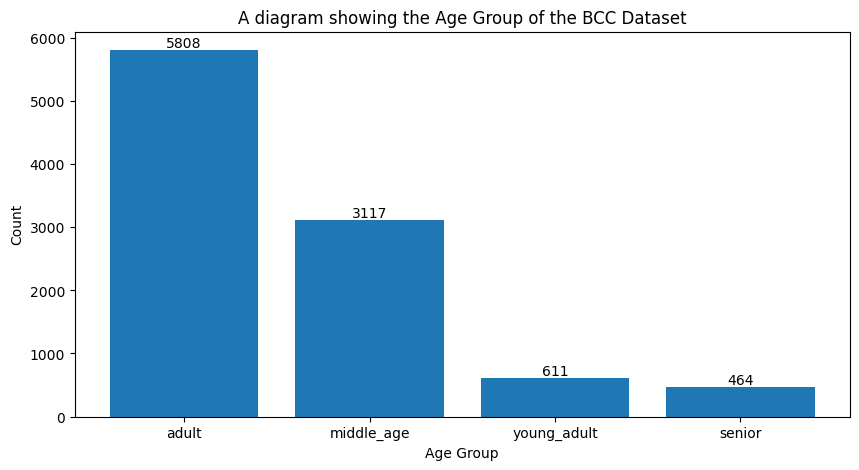

In [ ]:
# visualizing the age group for further insight.

# since Age_group its a categorical variable, value_counts() helps aggregate the number of unique objects.
data = bcc_copy['Age_group'].value_counts()

# visualizing the Age group data

plt.figure(figsize = [10,5])
plt.bar(x= data.index, height = data.values, data= bcc_copy, label = data.values)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('A diagram showing the Age Group of the BCC Dataset')

# adding text values to each bar in the plot. 

for i, value in enumerate(data): #enumerate iterates over the data while indexing each value.
    plt.annotate(str(value), (i,value), ha='center', va='bottom')
          
print('This clearly shows that the Bank has a higher number of adults as compared to the rest of the age groups')

### <b><u>Bivariate Visualization </u></b> 

### 2. <b><u> Churn rate of customers</u><b>
Determines the percentage of customers that churned out of 10,000 customers using piechart.


In [ ]:
data = bcc_copy[bcc_copy['Exited'] == 1]
data.head()

,Surname,CreditScore,Geography,Gender,Age,Age_group,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,Hargrave,619,France,Female,42,middle_age,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
2,Onio,502,France,Female,42,middle_age,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
5,Chu,645,Spain,Male,44,middle_age,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484
7,Obinna,376,Germany,Female,29,adult,4,115046.74,4,1,0,119346.88,1,1,2,DIAMOND,282
16,Romeo,653,Germany,Male,58,middle_age,1,132602.88,1,1,0,5097.67,1,0,2,SILVER,163


In [ ]:
# churn calculation: (total number of exited customers/total number of customers) *100
data = (bcc_copy[bcc_copy['Exited'] == 1].shape[0]/ bcc_copy.shape[0]) * 100
#round output to 2 decimal places.
print('{:.1f}% of customers churned'.format(data))

20.4% of customers churned


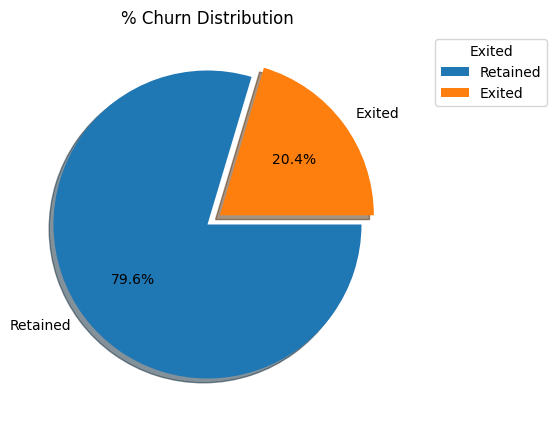

In [ ]:
#Visualizing the data.
plt.figure(figsize = [10,5])
data = bcc_copy['Exited'].value_counts()
labels = ['Retained', 'Exited']
explode = [0,0.1]
viz = plt.pie(data, labels = labels, autopct = '%0.1f%%', explode = explode, shadow = True, counterclock = False)
plt.title('% Churn Distribution', loc = 'center')
plt.legend(loc = 'upper right', bbox_to_anchor = [1.4,1], title = 'Exited');

   <b>Observation:</b> 20.4% of customers churned.

### 3.<b><u>Churn by Credit score</u></b>
<b><u>What is Credit Score?</u></b>   
Credit Score is a rating that determines a customer's creditworthiness of getting a loan from a bank. The higher the score the higher the chances of getting approved for a loan. 


In [ ]:
# Calculating the median churn rate based on credit score and rounding the result to the nearest whole number
data = round(bcc_copy.groupby('Exited')['CreditScore'].median(),)
data

Exited
0    653.0
1    646.0
Name: CreditScore, dtype: float64

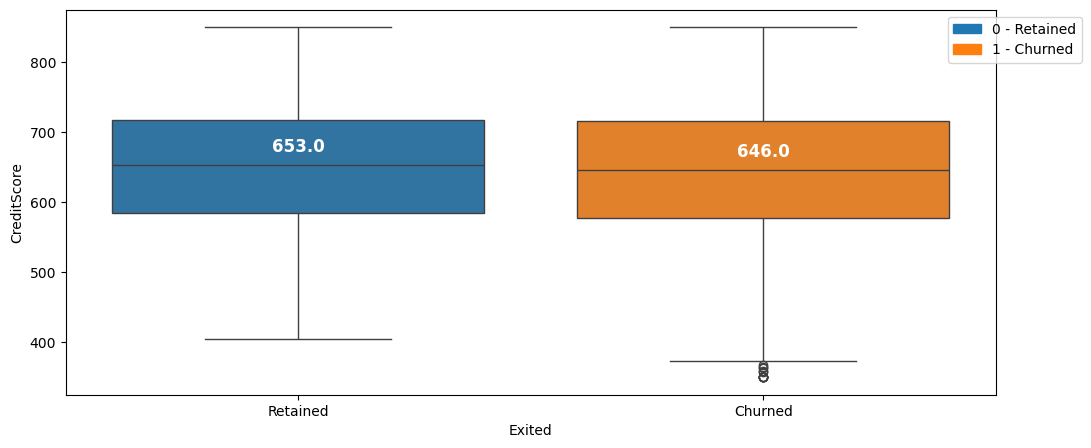

In [23]:
colors = [sns.color_palette()[0], sns.color_palette()[1]] # this occured because the legend did not display the desired color
plt.figure(figsize =[12,5])
box_plot = sns.boxplot(data = bcc_copy, x = bcc_copy['Exited'], y = bcc_copy['CreditScore'], hue=bcc_copy['Exited'])
plt.xticks(ticks = [0,1], labels = ['Retained','Churned'])
plt.xlabel('Exited')
plt.ylabel('CreditScore')

# Add color to the legend labels
plt.legend(handles= [plt.Rectangle((0,0),1,1, color = colors[i]) for i in range(len(colors))], 
           labels = ['0 - Retained', '1 - Churned'], loc = 'upper right', bbox_to_anchor = [1.1,1] 
           )

# calculating the median credit score and vertical offset position
median = bcc_copy.groupby('Exited')['CreditScore'].median()
vertical_offset = bcc_copy['CreditScore'].median() * 0.02 # to offset value from the median line in the displayed boxplot.

# applying the median text value to the box plot visualization
for xticks in box_plot.get_xticks():
    box_plot.text(xticks,median[xticks] + vertical_offset, median[xticks], 
                  ha = 'center', va ='bottom', weight = 'semibold', color = 'w', fontsize = 'large')

<b>Observation</b>: There is a minimal difference between the median of the credit score of retained customer and churned customer. This suggests that there is minimal correlation between, Churn and Creditscore.

It is worth taking note that customers that churn tend to have a lower credit score as suspected.

### 4.<b><u>Churn rate by Age group</u></b>  


In [19]:
# using crosstab to visualize churn rate by Age group.

ct_table = pd.crosstab(index = bcc_copy['Age_group'], columns = bcc_copy['Exited'], values = bcc_copy['Exited'], aggfunc = 'count')

#applying lambda function to get the mean of each row in 0 dp
ct_table['% churn'] = round(ct_table.apply(lambda col: col[1]/(col[0] + col[1]), axis = 1) *100, )

print(ct_table)


Exited          0     1  % churn
Age_group                       
adult        5167   641     11.0
middle_age   1881  1236     40.0
senior        349   115     25.0
young_adult   565    46      8.0


<b>Observation:</b> From the result above, middle age adults (41-60) churn the most with a churn rate of 40%. Further investigation should be done to determine why this is the case. Analysis such as satisfaction score across age groups, complaint across age groups, credit card score and points earned across age groups and Credit card ownership across age groups can be carried to uncover insight.

### 5.<b><u>Churn rate by Tenure:</u></b> 
Churn rate based on the number of years the client has been a customer of the bank. 


In [20]:
#using crosstab to visualize churn rate by Tenure.

churn_rate = pd.crosstab(index =  bcc_copy['Tenure'], columns =  bcc_copy['Exited'], values = bcc_copy['Exited'], aggfunc = 'count')

#applying lambda function to get the mean of each row in 0 dp

churn_rate['% churn'] = round(churn_rate.apply(lambda col: col[1]/(col[0]+col[1]), axis = 1)*100, )
churn_rate

Exited,0,1,% churn
Tenure,,,
0,318,95,23.0
1,803,232,22.0
2,847,201,19.0
3,796,213,21.0
4,786,203,21.0
5,803,209,21.0
6,771,196,20.0
7,851,177,17.0
8,828,197,19.0


<b>Observation:</b> Customers with a one-year tenure churn have the highest churn rate (23%). It is recommended that the Bank strengthens its onboarding programmes for new clients and measure the effectiveness.

### 6. <b><u>Churn rate by Number of products.</u></b> 


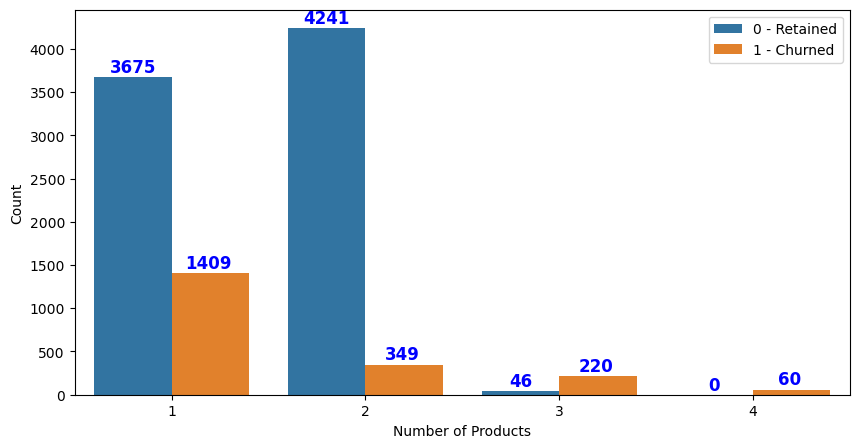

In [21]:
# visualizing customer's distribution by number of products purchased.
plt.figure(figsize=[10, 5])
viz = sns.countplot(data=bcc_copy, x=bcc_copy['NumOfProducts'], hue=bcc_copy['Exited'])
plt.xticks(ticks=[0, 1, 2, 3], labels=[1, 2, 3, 4])
plt.xlabel('Number of Products')
plt.ylabel('Count')
plt.legend(labels=['0 - Retained', '1 - Churned'])

# Counting the number of customers per product
count = bcc_copy.groupby(['NumOfProducts', 'Exited'])['Exited'].count().to_dict()

# Setting the vertical offset for the count value
vertical_offset = bcc_copy['Exited'].count() * 0.0009

# Setting the count values as text for each hue in the plot
for xticks, labels in zip (viz.get_xticks(), viz.get_xticklabels()):
    # Retrieves the array of the xticks/horizontal position of each plot
    for hue_ticks in viz.get_legend_handles_labels()[1]:
        # Specifying '[1]' returns the labels of the legend.
        count_value = count.get((int(labels.get_text()), int(hue_ticks)), 0)
        x_pos = xticks - 0.2 if hue_ticks == '0' else xticks + 0.19
        viz.text(x_pos, count_value + vertical_offset, count_value,
                 ha='center', va='bottom', weight='semibold', color='b', fontsize='large')

plt.show()

In [22]:
#calculating the churn rate per product.
churn_rate = pd.crosstab(index =  bcc_copy['NumOfProducts'], columns =  bcc_copy['Exited'], values = bcc_copy['Exited'], aggfunc = 'count')

churn_rate['% churn']= churn_rate.apply(lambda col: col[1]/(col[0]+col[1]) *100 if col[0] > 0 else 100, axis = 1)

round(churn_rate,)

Exited,0,1,% churn
NumOfProducts,,,
1,3675.0,1409.0,28.0
2,4241.0,349.0,8.0
3,46.0,220.0,83.0
4,NaN,60.0,100.0


<b>Observation:</b> Customers who use four banking products churn (100%) while those who use three products churn (83%).  To reduce churn, the bank should review/strengthen its product offering, incentivize bundle packages, provide personalised product services and measure its effectiveness.  

### 7. <b><u>Churn rate by Geography.</u></b>



In [23]:
churn_rate = pd.crosstab(index =  bcc_copy['Geography'], columns = bcc_copy['Exited'] ,values = bcc_copy['Exited'], aggfunc = 'count')
churn_rate['% churn'] = round(churn_rate.apply(lambda col: (col[1]/(col[0]+col[1]))*100, axis =1),)
churn_rate.values[:,-1]

churn_rate


Exited,0,1,% churn
Geography,,,
France,4203,811,16.0
Germany,1695,814,32.0
Spain,2064,413,17.0


<b>Observation:</b> The Bank needs to understand the common complaints amongst their customers in Germany and replicate the customer experience and customer success initiatives done in France and Spain. 

### 8. <b><u>Churn rate by Gender.</u></b>

In [24]:
churn_rate = pd.crosstab(index =  bcc_copy['Gender'], columns = bcc_copy['Exited'], values = bcc_copy['Exited'],
                         aggfunc = 'count')
churn_rate
churn_rate['% churn'] = round(churn_rate.apply(lambda col: (col[1]/(col[0]+col[1]))*100, axis = 1),)
churn_rate

Exited,0,1,% churn
Gender,,,
Female,3404,1139,25.0
Male,4558,899,16.0


<b>Observation:</b> Female customers have a higher churn rate than the male customers.

### 9. <b><u>Churn rate by HasCrCard.</u></b>  
Churn rate based on credit card ownership

In [25]:
churn_rate = pd.crosstab(index =bcc_copy['HasCrCard'] , columns = bcc_copy['Exited'] , values = bcc_copy['HasCrCard'], aggfunc = 'count')
churn_rate['% churn'] = round(churn_rate.apply( lambda col: (col[1]/(col[0]+col[1]))*100, axis = 1),)
churn_rate


Exited,0,1,% churn
HasCrCard,,,
0,2332,613,21.0
1,5630,1425,20.0


<b>Observation:</b> While there is a small variaiton in churn rate, customer without credit cards tend to churn more. 

### <b><u>Multivariate Visualization </u></b> 

### 10. <b><u>Churn by Number of products and Age/Age group.</u></b> 

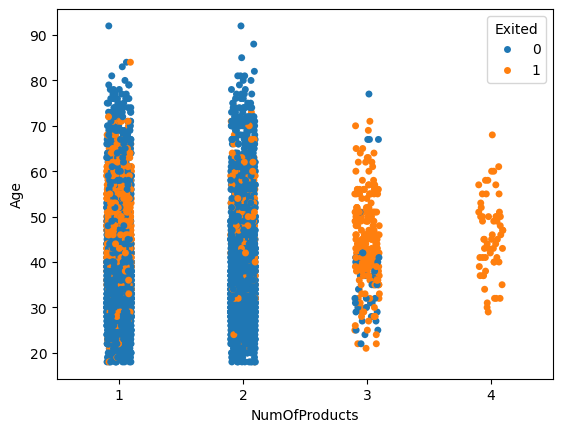

In [26]:
# visualise the 2 categorical variable vs 1 numerical variable

viz = sns.stripplot(data = bcc_copy, x = bcc_copy['NumOfProducts'], y = bcc_copy['Age'], hue = bcc_copy['Exited'], jitter = True)
viz;

In [27]:
# for further insight, it is important to visualise how products are distributed accross age groups s.

churn = pd.crosstab(index =  [bcc_copy['Age_group'], bcc_copy['Exited']], columns =  bcc_copy['NumOfProducts'], values = bcc_copy['NumOfProducts'], aggfunc = 'count')
round(churn,)

NumOfProducts            1       2      3     4
Age_group   Exited                             
adult       0       2365.0  2772.0   30.0   NaN
            1        438.0   119.0   68.0  16.0
middle_age  0        879.0   994.0    8.0   NaN
            1        868.0   193.0  133.0  42.0
senior      0        174.0   171.0    4.0   NaN
            1         75.0    25.0   13.0   2.0
young_adult 0        257.0   304.0    4.0   NaN
            1         28.0    12.0    6.0   NaN

<b>Observation:</b> Based on the above visualisations:  
i.   Customers with two products tend to churn less.  
ii.  Intrestingly, young adults (18-25yo) have never purchased 4 products.  

### 11. <b><u>Churn by Number of products and Balance</u></b>


In [28]:
# visualise the variables below. 
churn = pd.crosstab(index = bcc_copy['NumOfProducts'], columns =  bcc_copy['Exited'], values = bcc_copy['Balance'], aggfunc = 'mean')
round(churn,)

Exited,0,1
NumOfProducts,,
1,101053.0,92029.0
2,48721.0,90260.0
3,25744.0,85853.0
4,NaN,93733.0


<b>Observation:</b> The heat map of Number of products and Account balance signifies a negative correlation of -0.3. Based on the table above, the average account balance reduces as the number of products increases. The impact is more pronounced on retained customers than their churned counterpart.

### 12. <b><u>Churn by Active memebership and Age</u></b>
Churn based on the customer's active membership

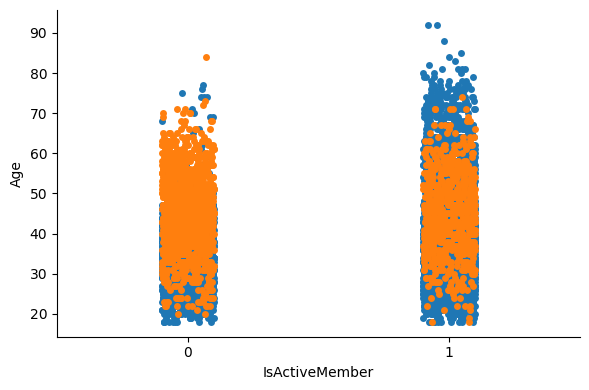

In [29]:
# visualise the variables below    
viz = sns.FacetGrid(data = bcc_copy , hue = 'Exited',  height=4, aspect=1.5)

# using map function to visualize the categorical stripplot on the grid created

viz = viz.map(sns.stripplot, 'IsActiveMember' ,'Age' , order = [0,1])

plt.show()

In [30]:
# Count the number of customers for each combination of 'IsActiveMember' and 'Exited'
count = bcc_copy.groupby(['IsActiveMember', 'Exited'])['Exited'].count()
count

IsActiveMember  Exited
0               0         3546
                1         1303
1               0         4416
                1          735
Name: Exited, dtype: int64

<b>Observation:</b> Active memebership of customers can determine if they churn or not. As seen, active members that stayed with the bank ('1''0') are significantly greater than their churned counterpart ('1''1'). It is also worth taking a dive into how age plays a part. 

In [31]:
# Calculate the median age for each combination of 'IsActiveMember' and 'Exited'
median = bcc_copy.groupby(['IsActiveMember', 'Exited'])['Age'].median()
median

IsActiveMember  Exited
0               0         35.0
                1         45.0
1               0         37.0
                1         45.0
Name: Age, dtype: float64

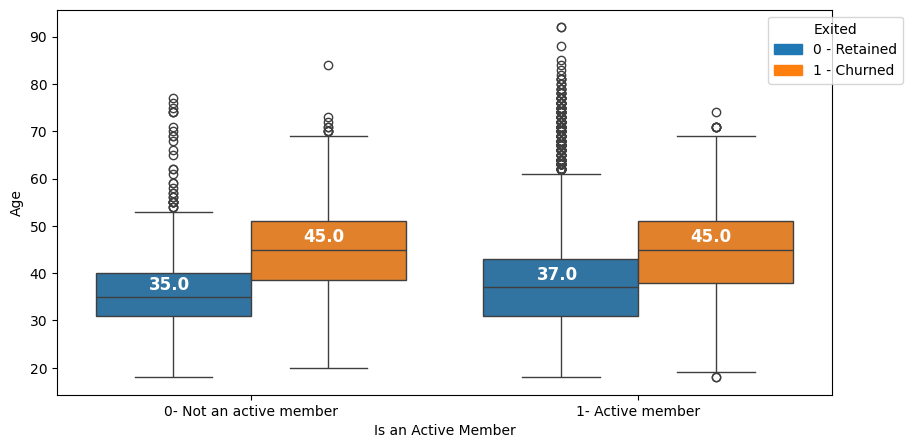

In [32]:
# Visualise the table above.

# Adding the appropriate color to the legend anchor box
colors = [sns.color_palette()[0], sns.color_palette()[1]] 
plt.figure(figsize=[10, 5])
viz = sns.boxplot(data=bcc_copy, x=bcc_copy['IsActiveMember'], y=bcc_copy['Age'], hue=bcc_copy['Exited'])
plt.xticks(ticks=[0, 1], labels=['0- Not an active member','1- Active member'])
plt.xlabel('Is an Active Member')
plt.ylabel('Age')

# Create the custom legend anchor box 
plt.legend(handles=[plt.Rectangle((0, 0), 1, 1, color=colors[i]) for i in range(len(colors))],
           labels=['0 - Retained', '1 - Churned'], loc='upper right', bbox_to_anchor=[1.1, 1], title = 'Exited') # review the legend name later

# Calculate the median age for each combination of 'IsActiveMember' and 'Exited'
median = bcc_copy.groupby(['IsActiveMember', 'Exited'])['Age'].median()

# Define the vertical offset position
vertical_offset = bcc_copy['Age'].median() * 0.02

# Apply the median text value to the box plot visualization
for xticks in viz.get_xticks():
# Retrives the array of the xticks/horizontal position of each plot
    for hue_ticks in viz.get_legend_handles_labels()[1]: 
# Specifying '[1]' returns only the labels of the legend. 
# The label retrieves a list of string ['0','1'] from the hue variable 'Exited' 
        median_value = median[xticks][int(hue_ticks)]
        x_pos = xticks - 0.209 if hue_ticks == '0' else xticks + 0.188
        viz.text(x_pos, median_value + vertical_offset, median_value,
                 ha='center', va='bottom', weight='semibold', color='w', fontsize='large')

plt.show()

<b>Observation:</b> It shows that on an average, retained customers are relatively younger than their churned counterpart whather they are active members or not. 

### 13. <b><u>Churn by Credit score and Age_group</u></b>

In [33]:
medians =  pd.crosstab(index = bcc_copy['Age_group'], columns = bcc_copy['Exited'], 
                       values = bcc_copy['CreditScore'], aggfunc = 'median')
medians

Exited,0,1
Age_group,,
adult,654,650
middle_age,651,646
senior,656,633
young_adult,655,648


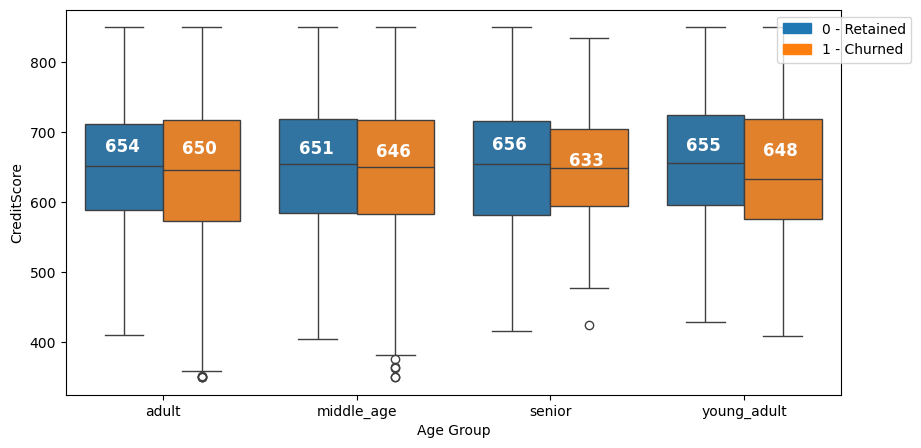

In [34]:
# Visualise the credit score for each combination of 'Age_group' and 'Exited' 

 # adding the appropriate color to the legend  anchor box
colors = [sns.color_palette()[0], sns.color_palette()[1]]
plt.figure(figsize=[10, 5])
viz = sns.boxplot(data=bcc_copy, x=bcc_copy['Age_group'], y=bcc_copy['CreditScore'], hue=bcc_copy['Exited'])
plt.xticks(ticks=[0, 1, 2, 3], labels=['adult','middle_age','senior','young_adult'])
plt.xlabel('Age Group')
plt.ylabel('CreditScore')

# create the custom legend anchor box 
plt.legend(handles=[plt.Rectangle((0, 0), 1, 1, color=colors[i]) for i in range(len(colors))],
           labels=['0 - Retained', '1 - Churned'], loc='upper right', bbox_to_anchor=[1.1, 1])

# Calculate the median age for each combination of each age group  categorized by the 'Exited' variable.
# Crosstab was a preference as it returns the output as a dataframe.
medians =  pd.crosstab(index = bcc_copy['Age_group'], columns = bcc_copy['Exited'], 
                       values = bcc_copy['CreditScore'], aggfunc = 'median')

# Define the vertical offset position
vertical_offset = bcc_copy['CreditScore'].median() * 0.02

# Apply the median text value to the box plot visualization

for xticks in viz.get_xticks():
# retrives the array of the xticks/horizontal position of each plot
    for hue_ticks in viz.get_legend_handles_labels()[1]: 
# specifying '[1]' returns only the labels of the legend. 
#The label retrieves a list of string ['0','1'] from the hue variable 'Exited' 
        median_value = medians.values[xticks][int(hue_ticks)]
        x_pos = xticks - 0.209 if hue_ticks == '0' else xticks + 0.188
        viz.text(x_pos, median_value + vertical_offset, median_value,
                 ha='center', va='bottom', weight='semibold', color='w', fontsize='large')
        
plt.show()

<b>Observation:</b> The median value across the various Age group shows that, retained customers have a higher creditscore than their churned counterparts. It can deduced that the credit score of a customer is an important factor that determines if a customer will churn or not.

### 14. <b><u>Churn by Credit card ownership, Credit Score and Points Earned</u></b>

<b>The importance of owning a Credit card:</b>   
If a customer use their credit cards smartly a lot of money can be saved by paying upfront for goods and servies while taking note of the cashback rate of the credit provider. 
Credit card plays a role in how much credit limit/loan one can get. The loan can then be used to purchase a car, house, groceries and so on. 

To get an approval for a credit card depends on having a good credit score and getting a good credit score relies on a caveat of having a good credit report that shows the customer's credit activities.   

In [35]:
# Calculate the median credit Score and Point Earned for each combination of 'HasCrCard' and 'Exited'

median = bcc_copy.groupby(['HasCrCard', 'Exited'])['CreditScore', 'Point Earned'].median()
round(median)

<ipython-input-35-a42ca85c2284>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  median = bcc_copy.groupby(['HasCrCard', 'Exited'])['CreditScore', 'Point Earned'].median()


CreditScore  Point Earned
HasCrCard Exited                           
0         0             656.0         606.0
          1             646.0         634.0
1         0             653.0         603.0
          1             646.0         594.0

The Bank's ideal customer should have a credit card with points earned via the various loyalty or reward programmes.  
Based on the table above, customers will be filtered using a credit score and point earned of 653 and 603 respevtively.

The benchmarked figures will determine:
i.  Retained customers who qualify and should be advised to own a credit card.
ii. Churned customers that qualified but did not own a credit card. 

#### i. Retained customers who qualify and should be advised to own a credit card: 

In [36]:
# Customers with a credit score >= 653 and points earned >= 603

# Use numpy logical operator to filter the dataframe for qualified customers
r_cust = bcc_copy[np.logical_and(bcc_copy['Exited'] == 0, bcc_copy['HasCrCard'] == 0, bcc_copy['CreditScore'] >= 653)] # logical and takes 2-3 positional arguments for its filtering operation
r_cust = r_cust[np.logical_and(bcc_copy['Exited'] == 0, bcc_copy['Point Earned'] >= 603)] 
print('{} customers qualify and should be advised to own a credit card'.format(r_cust.shape[0]))

<ipython-input-36-894b94efa5a0>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  r_cust = r_cust[np.logical_and(bcc_copy['Exited'] == 0, bcc_copy['Point Earned'] >= 603)]


1176 customers qualify and should be advised to own a credit card


#### ii. Churned customers that qualified but did not own a credit card.  
Further investigation should be done to determine if the lack of a credit card played a role in their decsion to exit the Bank.  
An additional analysis will be done using satisfaction score.

In [37]:
# Customers with a credit score >= 653 and points earned >= 603
# The bank should investigate further to determine why these customers churned. Further analysis will be done using satisfaction score.
c_cust = bcc_copy[np.logical_and(bcc_copy['Exited'] == 1, bcc_copy['HasCrCard'] == 0, bcc_copy['CreditScore'] >= 653)]
c_cust = c_cust[np.logical_and(bcc_copy['Exited'] == 1, bcc_copy['Point Earned'] >= 603)]
print('{} churned customers qualified but did not own a credit card'.format(c_cust.shape[0]))

<ipython-input-37-812a837529aa>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c_cust = c_cust[np.logical_and(bcc_copy['Exited'] == 1, bcc_copy['Point Earned'] >= 603)]


337 churned customers qualified but did not own a credit card


In [38]:
# analyse the satisfaction score of the customers that meet the credit score and points earned criteria.
churn = c_cust.groupby(['HasCrCard','Exited'])['CreditScore','Point Earned','Satisfaction Score'].mean()
churn
print('The analysis shows that churned customers that qualified but did not own a credit card have a neutral satisfaction score of 3')

<ipython-input-38-0932a3182bff>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  churn = c_cust.groupby(['HasCrCard','Exited'])['CreditScore','Point Earned','Satisfaction Score'].mean()


The analysis shows that churned customers that qualified but did not own a credit card have a neutral satisfaction score of 3


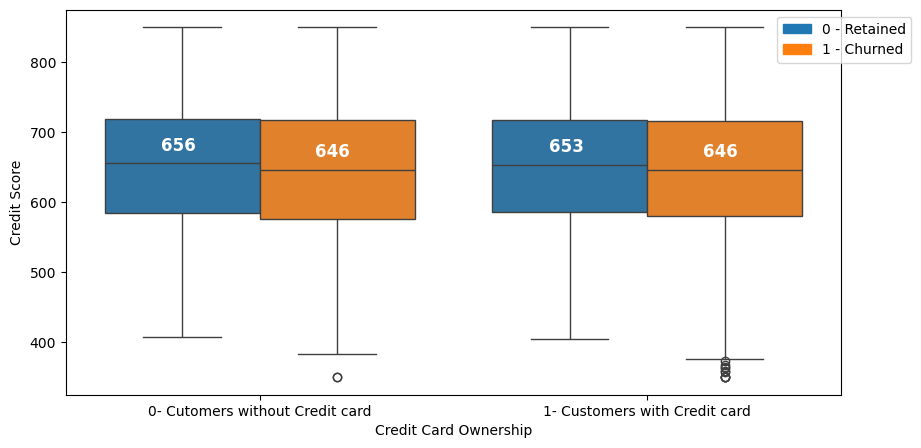

In [39]:
# visualise credit Card ownership, churn rate (catrgorical variables) vs credit score (numerical variable) using boxplot.

colors = [sns.color_palette()[0], sns.color_palette()[1]] # adding the appropriate color to the legend  anchor box
plt.figure(figsize=[10, 5])
viz = sns.boxplot(data=bcc_copy, x=bcc_copy['HasCrCard'], y=bcc_copy['CreditScore'], hue=bcc_copy['Exited'])
plt.xticks(ticks=[0, 1], labels=['0- Cutomers without Credit card','1- Customers with Credit card'])
plt.xlabel('Credit Card Ownership')
plt.ylabel('Credit Score')

# create the custom legend anchor box for the hue 
plt.legend(handles=[plt.Rectangle((0, 0), 1, 1, color=colors[i]) for i in range(len(colors))],
           labels=['0 - Retained', '1 - Churned'], loc='upper right', bbox_to_anchor=[1.1, 1])

# Calculate the median age for each combination of 'HasCrCard' and 'Exited'
medians = bcc_copy.groupby(['HasCrCard', 'Exited'])['CreditScore'].median()

# Define the vertical offset position
vertical_offset = bcc_copy['CreditScore'].median() * 0.02

# Apply the median text value to the box plot visualization

for xticks in viz.get_xticks():
# Retrives the array of the xticks/horizontal position of each plot
    for hue_ticks in viz.get_legend_handles_labels()[1]: 
# Specifying '[1]' returns only the labels of the legend. 
# The label retrieves a list of string ['0','1'] from the hue variable 'Exited' 
        median_value = medians[xticks][int(hue_ticks)]
        x_pos = xticks - 0.209 if hue_ticks == '0' else xticks + 0.188
        viz.text(x_pos, median_value + vertical_offset, round(median_value),
                 ha='center', va='bottom', weight='semibold', color='w', fontsize='large')

plt.show()

<b>Observation:</b> Retained customers across board have a relatively higher credit score than their churned counterpart 

### 15. <b><u>Churn by Credit card ownership, Satisfaction score, Credit Score and Points Earned</u></b> 
How does satisfaction score impact the variables above?  

In [40]:
churn = bcc_copy.groupby(['HasCrCard','Exited'])['CreditScore','Point Earned','Satisfaction Score'].mean()
churn

<ipython-input-40-5e3d44d6058e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  churn = bcc_copy.groupby(['HasCrCard','Exited'])['CreditScore','Point Earned','Satisfaction Score'].mean()


CreditScore  Point Earned  Satisfaction Score
HasCrCard Exited                                               
0         0        652.425815    608.141938            3.002144
          1        647.234910    618.872757            3.060359
1         0        651.594316    606.589343            3.024512
          1        644.631579    598.243509            2.970526

In [41]:
churn = bcc_copy['Satisfaction Score'].mean()
churn

3.0138

<b>Observation:</b> The table above shows a neutral score accross board with a <b>slight decrease in churned customers that owned a credit card leaning towards a distisatisfied score (2)</b>.   
The bank should investigate customer complaints using the 80/20 principle to identify common/popular complaints which might arise from a small number of sources.

## C. <b><u>EDA Insight Summary<u></b>
Summary of the analysis identifying key points/highlights.

i.    The Bank has a moderately young age distribution with adults (26-40) and young adults (18-25) making up a total of 64% of the Bank's customer base population.  
ii    The Bank approximately has 20% churn rate with middle age adults (41-60) accounting for the majority of the  Bank's churn.  
iii.  Customers with a one-year tenure have the highest churn rate (23%). It is recommended that the Bank strengthens its onboarding programmes for new clients and measure the effectiveness.  
iv.   Analysis shows that customers with 2 bank products churn the lowest (8%) with higher amounts of product resulting to a 80-100% churn rate. To counter the effect, the bank should review/strengthen its product offering, incentivize bundle product packages, provide personalised product services and measure its effectiveness.  
v.    Germany has the highest churn rate by geography (32%); The Bank needs to understand the common complaints amongst their customers in Germany and replicate the customer experience and customer success initiatives done in France and Spain.  
vi.   Analysis shows that the average account balance of a customer reduces as the number of products increases. The impact is more pronounced on retained customers than their churned counterpart.  
vii.  An active customer is less likely to churn.  
viii. Retained customers have a relatively higher credit score than their churned counterpart.  
ix.   Based on the filtering criteria, 1176 customers qualify and should be advised to own a credit card as they are potentially at risk to churn.  
x.    Further investigation can be carried out on 337 churned customers who qualified but did not own a credit card. This will help the Bank identify factors that determines churn.  
xi.   The Bank needs to improve its satisfaction score across board as the average satisfaction score shows that customers are neutral (3).

# <b>Data Science</b>

Dealing with categorical features 
- Scikit learn does not accept categorical features by default. 
 - Any categorical feature will be converted into numerical value. 
 - Categorical features will be converted to binary features called dummy variables.


<b><u>Data Science</u></b>  
<b>D. Preprocessing:</b>  
<b>E. Model Training and Prediction:</b>  
<b>F. Model Interpretation:</b>

## D. <b><u>Preprocessing<u></b>
In this section, the following items below will be adhered to.
i.   Irrelevant columns and highly correlated features will be dropped.     
ii.  Since scikitlearn does not accept categorical features by default, they will be converted into binary features by encoding categorical features.    
iv.  Handling Data Imbalance

#### i. Dropping Irrelevant Columns and highly correlated features

In [42]:
bcc_copy[['Exited','Complain']].corr()
print('Exited and Complain are highly correlated. The Complain feature will be dropped to avoid overfitting the dataset')

Exited and Complain are highly correlated. The Complain feature will be dropped to avoid overfitting the dataset


In [43]:
# dropping Surname, Age group and Complain

bcc_copy = bcc_copy.drop( columns = ['Surname','Age_group','Complain'],  axis= 1)
bcc_copy.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

#### ii. Encoding Categorical Features

In [44]:
# use the pandas function pd.get_dummies and drop_first to avoid dummy variables being highly correlated

bcc_dum = pd.get_dummies(bcc_copy, drop_first = True)

In [45]:
bcc_dum.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Gender_Male,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,2,464,0,0,0,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,3,456,0,1,0,0,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,3,377,0,0,0,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,5,350,0,0,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,5,425,0,1,0,1,0,0


#### iii. Splitting the Data set into Training and Test set
First, split the dataset into features and target variable.  
<b> a. Feature variables (X):</b> this are the independent or predicator variables.  
<b> b. Target vairiable (y):</b> this is the dependent or response variable.  

Afterwards, split the dataset into two segments,  
<b> c. The training set (X_train and y_train):</b> on which the model is trained.  
<b> d. The test set (X_test and y_test):</b> which is used for prediction.

In [46]:
#split the dataset into feature(X) and target(y) variables
X = bcc_dum.drop(columns = 'Exited' , axis = 1)
y= bcc_dum['Exited']

#view the newly created variables
X.columns
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [47]:
#splitting the dataset into features and target variable
# Exited will be the target variables since the objective of our predict customer churn.

from sklearn.model_selection import train_test_split

<b>Test size:</b>    using a test size of 25% which means that 25% of 10,000 variables will be set aside for model prediction (test set).    
<b>Random state:</b> ensures that for every iteration of this test, the same sample of data is selected (consistency)    
<b>Stratify:</b> ensures that there is no overrepresentation or underrepresentation of a customer group (0 or 1) while splitting the dataset. Therefore the split represent the proportion of the original sample.  

#### iv Handling Imbalance Data

The analysis performed previously shows that the target feature "Exited" is highly uneven i.e, imbalance. 
Imbalance data can be handled using Sythetic Minority Over Sampling Technique (SMOTE). SMOTE ensures that the majority and minority class in exited are even.


In [48]:
#summary of the imbalance data
fact = bcc_dum['Exited'].value_counts()
fact

0    7962
1    2038
Name: Exited, dtype: int64

In [49]:
#importing the SMOTE function
await piplite.install('imblearn') #installing imblearn
from imblearn.over_sampling import SMOTE

In [50]:
X_sam, y_sam = SMOTE().fit_resample(X,y)
y_sam.value_counts()

/lib/python3.11/site-packages/threadpoolctl.py:1019: RuntimeWarning: libc not found. The ctypes module in Python 3.11 is maybe too old for this OS.
  warnings.warn(


1    7962
0    7962
Name: Exited, dtype: int64

In [51]:
# train_test_split splits the dataset into train and test variables.
X_train, X_test, y_train, y_test = train_test_split(X_sam,y_sam, test_size = .25, random_state = 40)

#### v. Feature scaling

Based on the Machine learning algorithim/ model to be utilized, feature scaling is essential because the below named models calculate distances between data to arrive at a prediction.  

Scaling can be achieved using standard scaler.

In [52]:
#import standard scaler
from sklearn.preprocessing import StandardScaler

#instantiate the StandardScaler object
sc =StandardScaler()

# apply the scaler on the features

X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

<b>Fit:</b> The .fit() method is used to calculate the statistics of the dataset (mean, standard deviation).   
<b>Transform:</b> On the otherhand .transform(), is used to apply the scaling transformation on the training dataset

## E. <b><u>Model Prediction and Performance Evaluation<u></b>  
Various classification models will be used in predicting customer churn with a goal of evaluating their performance to ensure optimal model selection.  
The following models would be used as part of this exercise:  
i.   Logistic Regression  
ii.  Suppot Vector Machine  
iii. KNeighbors Classifier  
iv.  Decision Tree Classifier  
v.   Random forest  
vi.  Gradient Boosting Classifier  
    
    
Model Evaluation will be done using sklearn metrics module:  
    <b>i.  Accuracy_Score:</b>  This measures the total proportion of correctly classified customers.  
<b>ii. Precision_Score:</b> This measures how well the model could predict true positives (churned customers) out of all the predicted churned customers.(It answers the question: 
Out of all the customers the model predicted as churned, how many actually churned?)  
<b>iii. Recall_Score:</b>   This measures how well the model could predict true positives (churned customers) correctly. (It answers the question: Out of all the customers who actually churned, how many did the model predict correctly?)  
<b>iv. F1_ Score:</b>        A higher F1 score indicates that the model achieves a good balance between precision and recall. It's shows a comprehensive understanding of a model's effectiveness.

### <b>i. Logistic Regression</b>   

In [53]:
#import logistic regression classifier

from sklearn.linear_model import LogisticRegression

#instantiate the object
log = LogisticRegression()

In [54]:
# train the model on the x and y train features

log = log.fit(X_train, y_train)

In [55]:
# make prediction on the test feature

y_pred1 = log.predict(X_test)

In [56]:
#evaluate the model performance

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

print("Accuracy Score: {}".format(accuracy_score(y_test, y_pred1)) +"\n"+ "Precision Score: {}".format(precision_score(y_test, y_pred1))
      +"\n"+ "Recall Score: {}".format(recall_score(y_test, y_pred1))
       +"\n"+ "F1 Score: {}".format(f1_score(y_test, y_pred1)))

Accuracy Score: 0.8023109771414217
Precision Score: 0.8139888494678155
Recall Score: 0.792694965449161
F1 Score: 0.80320080020005


### <b>ii. Support Vector Machine (SVM)</b>   

In [57]:
# importing the support vector machine classifier

from sklearn import svm

#instantiate the object
svm = svm.SVC()

In [58]:
# train the model on the x and y train features

svm = svm.fit(X_train,y_train)

In [59]:
# make prediction on the test feature

y_pred2 = svm.predict(X_test)

In [60]:
#evaluate the model performance

print("Accuracy Score: {}".format(accuracy_score(y_test, y_pred2)) +"\n"+ "Precision Score: {}".format(precision_score(y_test, y_pred2))
      +"\n"+ "Recall Score: {}".format(recall_score(y_test, y_pred2))
       +"\n"+ "F1 Score: {}".format(f1_score(y_test, y_pred2)))

Accuracy Score: 0.8548103491585028
Precision Score: 0.8830687830687831
Recall Score: 0.8237907206317868
F1 Score: 0.852400408580184


### <b>iii. KNeighbors Classifier</b>   

In [61]:
# importing the KNeighbors classifier

from sklearn.neighbors import KNeighborsClassifier

# instantiate the object
knn = KNeighborsClassifier()

In [62]:
# train the model on the x and y train features

knn = knn.fit(X_train, y_train)

In [63]:
# make prediction on the test feature

y_pred3 = knn.predict(X_test)

In [64]:
# evaluate the model performance

print("Accuracy Score: {}".format(accuracy_score(y_test, y_pred3)) +"\n"+ "Precision Score: {}".format(precision_score(y_test, y_pred3))
      +"\n"+ "Recall Score: {}".format(recall_score(y_test, y_pred3))
       +"\n"+ "F1 Score: {}".format(f1_score(y_test, y_pred3)))

Accuracy Score: 0.8251695553880934
Precision Score: 0.8253424657534246
Recall Score: 0.832675222112537
F1 Score: 0.8289926289926289


### <b>iv. Decision Tree Classifier</b>   

In [65]:
# importing the  Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

# instantiate the object
dtc = DecisionTreeClassifier()

In [66]:
# train the model on the x and y train features

dtc = dtc.fit(X_train, y_train)

In [67]:
# make prediction on the test feature

y_pred4 = dtc.predict(X_test)

In [68]:
# evaluate the model performance

print("Accuracy Score: {}".format(accuracy_score(y_test, y_pred4)) +"\n"+ "Precision Score: {}".format(precision_score(y_test, y_pred4))
      +"\n"+ "Recall Score: {}".format(recall_score(y_test, y_pred4))
       +"\n"+ "F1 Score: {}".format(f1_score(y_test, y_pred4)))

Accuracy Score: 0.8013062044712383
Precision Score: 0.7975903614457831
Recall Score: 0.8168805528134254
F1 Score: 0.8071202145818092


### <b>v. Random Forest Classifier</b>   

In [69]:
# importing the  Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

# instantiate the object
rfc = RandomForestClassifier()

In [70]:
# train the model on the x and y train features

rfc = rfc.fit(X_train, y_train)

In [71]:
# make prediction on the test feature

y_pred5 = rfc.predict(X_test)

In [72]:
# evaluate the model performance

print("Accuracy Score: {}".format(accuracy_score(y_test, y_pred5)) +"\n"+ "Precision Score: {}".format(precision_score(y_test, y_pred5))
      +"\n"+ "Recall Score: {}".format(recall_score(y_test, y_pred5))
       +"\n"+ "F1 Score: {}".format(f1_score(y_test, y_pred5)))

Accuracy Score: 0.8721426777191661
Precision Score: 0.8956703182055294
Recall Score: 0.8474827245804541
F1 Score: 0.8709104742581791


### <b>vi. Gradient Boosting Classifier</b>   

In [73]:
# importing the  Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier

# instantiate the object
gbc = GradientBoostingClassifier()

In [74]:
# train the model on the x and y train features

gbc = gbc.fit(X_train, y_train)

In [75]:
# make prediction on the test feature
y_pred6 = gbc.predict(X_test)

In [76]:
# evaluate the model performance

print("Accuracy Score: {}".format(accuracy_score(y_test, y_pred6)) +"\n"+
      "Precision Score: {}".format(precision_score(y_test, y_pred6))
      +"\n"+ "Recall Score: {}".format(recall_score(y_test, y_pred6))
       +"\n"+ "F1 Score: {}".format(f1_score(y_test, y_pred6)))

Accuracy Score: 0.8555639286611404
Precision Score: 0.8722421754746024
Recall Score: 0.8390918065153011
F1 Score: 0.8553459119496856


#### Performance Evaluation

In [77]:
# Performance Evaluation: Accuracy

model_accuracy = pd.DataFrame({'Models':['LR', 'SVM','DTC', 'KNN', 'RFC', 'GBC'],
                                'ACC': [accuracy_score(y_test, y_pred1),
                                        accuracy_score(y_test, y_pred2),
                                        accuracy_score(y_test, y_pred3),
                                        accuracy_score(y_test, y_pred4),
                                        accuracy_score(y_test, y_pred5),
                                        accuracy_score(y_test, y_pred6)]})
model_accuracy

,Models,ACC
0,LR,0.802311
1,SVM,0.854810
2,DTC,0.825170
3,KNN,0.801306
4,RFC,0.872143
5,GBC,0.855564


In [78]:
# Performance Evaluation: F1Score

model_f1score = pd.DataFrame({'Models':['LR', 'SVM','DTC', 'KNN', 'RFC', 'GBC'],
                                'F1Score': [f1_score(y_test, y_pred1),
                                        f1_score(y_test, y_pred2),
                                        f1_score(y_test, y_pred3),
                                        f1_score(y_test, y_pred4),
                                        f1_score(y_test, y_pred5),
                                        f1_score(y_test, y_pred6)]})
model_f1score

,Models,F1Score
0,LR,0.803201
1,SVM,0.852400
2,DTC,0.828993
3,KNN,0.807120
4,RFC,0.870910
5,GBC,0.855346


In [79]:
print('Random Forest Classifier has the highest Accuracy of: {} and and an F1 Score of: {}'
      .format(round(accuracy_score(y_test, y_pred5),2), round(f1_score(y_test, y_pred5),2)))

Random Forest Classifier has the highest Accuracy of: 0.87 and and an F1 Score of: 0.87


## F. <b><u>Save the Model and Scaler<u></b>  
Saving the model and scaler gives the permission to load and reuse them.  

The observation aboves shows that Random Forest Classifier has the best performance amongst other models and as such will be saved.

The models were trained on the test and train dataset for testing which is meant to evaluate performance but in reality/production, actual data will be inputted with the expectation of a prediction.

In this analysis, the actual data is stored in X_sam and y_sam. Kindly note that these two variables will be scaled to ensure optimal model performance.

In [80]:
from sklearn.pipeline import Pipeline

In [81]:
# create the pipeline listing the scaler and Random Forest Classifier as the the model.
steps = [('scaler', StandardScaler()), ('rfc', RandomForestClassifier())]

#instantiate the object 
pipe = Pipeline(steps)

In [82]:
pipe = pipe.fit(X_sam, y_sam)

In [83]:
# save the model and scaler
import joblib

joblib.dump(rfc, 'bank_churn_prediction_model')
joblib.dump(sc, 'standard_scaler')

['standard_scaler']

In [84]:
# test if the saved model functions as expected

# load the model
model = joblib.load('bank_churn_prediction_model')
scaler = joblib.load('standard_scaler')

In [85]:
bcc_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Age                 10000 non-null  int64  
 2   Tenure              10000 non-null  int64  
 3   Balance             10000 non-null  float64
 4   NumOfProducts       10000 non-null  int64  
 5   HasCrCard           10000 non-null  int64  
 6   IsActiveMember      10000 non-null  int64  
 7   EstimatedSalary     10000 non-null  float64
 8   Exited              10000 non-null  int64  
 9   Satisfaction Score  10000 non-null  int64  
 10  Point Earned        10000 non-null  int64  
 11  Geography_Germany   10000 non-null  uint8  
 12  Geography_Spain     10000 non-null  uint8  
 13  Gender_Male         10000 non-null  uint8  
 14  Card Type_GOLD      10000 non-null  uint8  
 15  Card Type_PLATINUM  10000 non-null  uint8  
 16  Card 

In [86]:
bcc_dum.rename(columns=
                {'Card Type_GOLD': 'Card_Type_GOLD', 'Card Type_PLATINUM':'Card_Type_PLATINUM', 'Card Type_SILVER':'Card_Type_SILVER'})

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Gender_Male,Card_Type_GOLD,Card_Type_PLATINUM,Card_Type_SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,2,464,0,0,0,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,3,456,0,1,0,0,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,3,377,0,0,0,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,5,350,0,0,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,5,425,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,300,0,0,1,0,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,0,5,771,0,0,1,0,1,0
9997,709,36,7,0.00,1,0,1,42085.58,1,3,564,0,0,0,0,0,1
9998,772,42,3,75075.31,2,1,0,92888.52,1,2,339,1,0,1,1,0,0


In [87]:
# predict using the model and sample data
# inputted values = CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard','IsActiveMember', 'EstimatedSalary', 'Satisfaction Score',
# 'Point Earned', 'Geography_Germany', 'Geography_Spain', 'Gender_Male',
#'Card Type_GOLD', 'Card Type_PLATINUM', 'Card Type_SILVER'

# Test the predictive model

prediction = model.predict([[690, 37, 5, 10000, 3, 0, 1, 100000, 5, 610, 0,0,1, 0,1,0]])
prediction    

array([0], dtype=int64)

In [88]:
print('Array [0] means the hypotetical customer did not churn')

Array [0] means the hypotetical customer did not churn


## <b>GUI</b>

In [89]:
# Creating a Graphical User Interface using tkinter.
# This allows users input customer details and get a prediction.

from tkinter import *
import joblib
from sklearn.preprocessing import StandardScaler

# Create the root window
root = Tk()

# Load the pre-trained model
model = joblib.load('bank_churn_prediction_model')

# Create a StandardScaler object
scaler = joblib.load('standard_scaler')

# Mapping for result labels
result_mapping = {0: "Retained", 1: "Churned"}

# Function to get prediction result label
def get_result_label(result):
    return result_mapping[result]


# get the input values
def show_entry_fields():
    p1 = int(entries[0].get())
    p2 = int(entries[1].get())
    p3 = int(entries[2].get())
    p4 = float(entries[3].get())
    p5 = int(entries[4].get())
    p6 = int(entries[5].get())
    p7 = int(entries[6].get())
    p8 = float(entries[7].get())
    p9 = int(entries[8].get())
    p10 = int(entries[9].get())
    p11 = int(entries[10].get())
    
    if p11 == 1:
        Geography_Germany = 1
        Geography_Spain = 0
        Geography_France = 0
    elif p11 == 2:
        Geography_Germany = 0
        Geography_Spain = 1
        Geography_France = 0
    elif p11 == 3:
        Geography_Germany = 0
        Geography_Spain = 0
        Geography_France = 1
    
    p12 = int(entries[11].get())
    p13 = int(entries[12].get())
    
    if p13 == 0:
        Card_Type_GOLD = 0      
        Card_Type_PLATINUM = 0   
        Card_Type_SILVER = 0
        Card_Type_DIAMOND = 0
    if p13 == 1:
        Card_Type_GOLD = 1      
        Card_Type_PLATINUM = 0   
        Card_Type_SILVER = 0
        Card_Type_DIAMOND = 0
    elif p13 == 2:
        Card_Type_GOLD = 0     
        Card_Type_PLATINUM = 1   
        Card_Type_SILVER = 0
        Card_Type_DIAMOND = 0
    elif p13 == 3:
        Card_Type_GOLD = 0     
        Card_Type_PLATINUM = 0  
        Card_Type_SILVER = 1
        Card_Type_DIAMOND = 0
    elif p13 == 4:
        Card_Type_GOLD = 0     
        Card_Type_PLATINUM = 0   
        Card_Type_SILVER = 0
        Card_Type_DIAMOND = 1
        
     # Standardize the input features using the scaler
    scaled_input = scaler.transform([[p1, p2, p3, p4, p5, p6, p7, p8, p9, p10,
                                   Geography_Germany, Geography_Spain, p12,
                                   Card_Type_GOLD, Card_Type_PLATINUM, Card_Type_SILVER]])
    
    # Make prediction using the model
    result = model.predict(scaled_input)
    
    # Get the prediction result label
    result_label = get_result_label(result[0])
    
    # Update the result label in the GUI
    result_var.set(result_label)
    
    
# Create Entry widgets with labels
labels = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard','IsActiveMember', 
          'EstimatedSalary', 'Satisfaction Score','Point Earned', 'Geography (1-Germany,2-Spain,3-France)','Gender(0-F,1-M)','Card_Type(0-None-1-Gold,2-Platinum,3-Silver,4-Diamond)']

entries= []

for row, label_text in enumerate(labels, start=1):
    label = Label(root, text=label_text)
    label.grid(row=row, column=0, padx=10, pady=5, sticky=E)
    
    entry = Entry(root)
    entry.grid(row=row, column=1, padx=10, pady=5)
    entries.append(entry)
    

Button(root, text='Predict', command=show_entry_fields).grid(row=len(labels)+1, column=0, pady=10)
result_var = StringVar()
result_label = Label(root, textvariable=result_var, font=("Helvetica", 16))
result_label.grid(row=len(labels)+1, column=1, pady=10, sticky=W)

# Start the main event loop
root.mainloop()


<class 'ModuleNotFoundError'>: The module 'tkinter' is removed from the Python standard library in the Pyodide distribution due to browser limitations.
See https://pyodide.org/en/stable/usage/loading-packages.html for more details.

In [90]:
bcc_dum.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Gender_Male,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,3.013800,606.515100,0.250900,0.247700,0.545700,0.25020,0.249500,0.249600
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,1.405919,225.924839,0.433553,0.431698,0.497932,0.43315,0.432745,0.432803
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,1.000000,119.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,2.000000,410.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,3.000000,605.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,4.000000,801.000000,1.000000,0.000000,1.000000,1.00000,0.000000,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,5.000000,1000.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
